#Plant  Diseas Prediction (3 Class)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount our google drive on colab so that we can use the dataset directly from our drive.

Next import all the required libraries. Import all the required layers, activations, optimizers for the  CNN Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
# from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json

# To convert vector into binary class matrix
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.

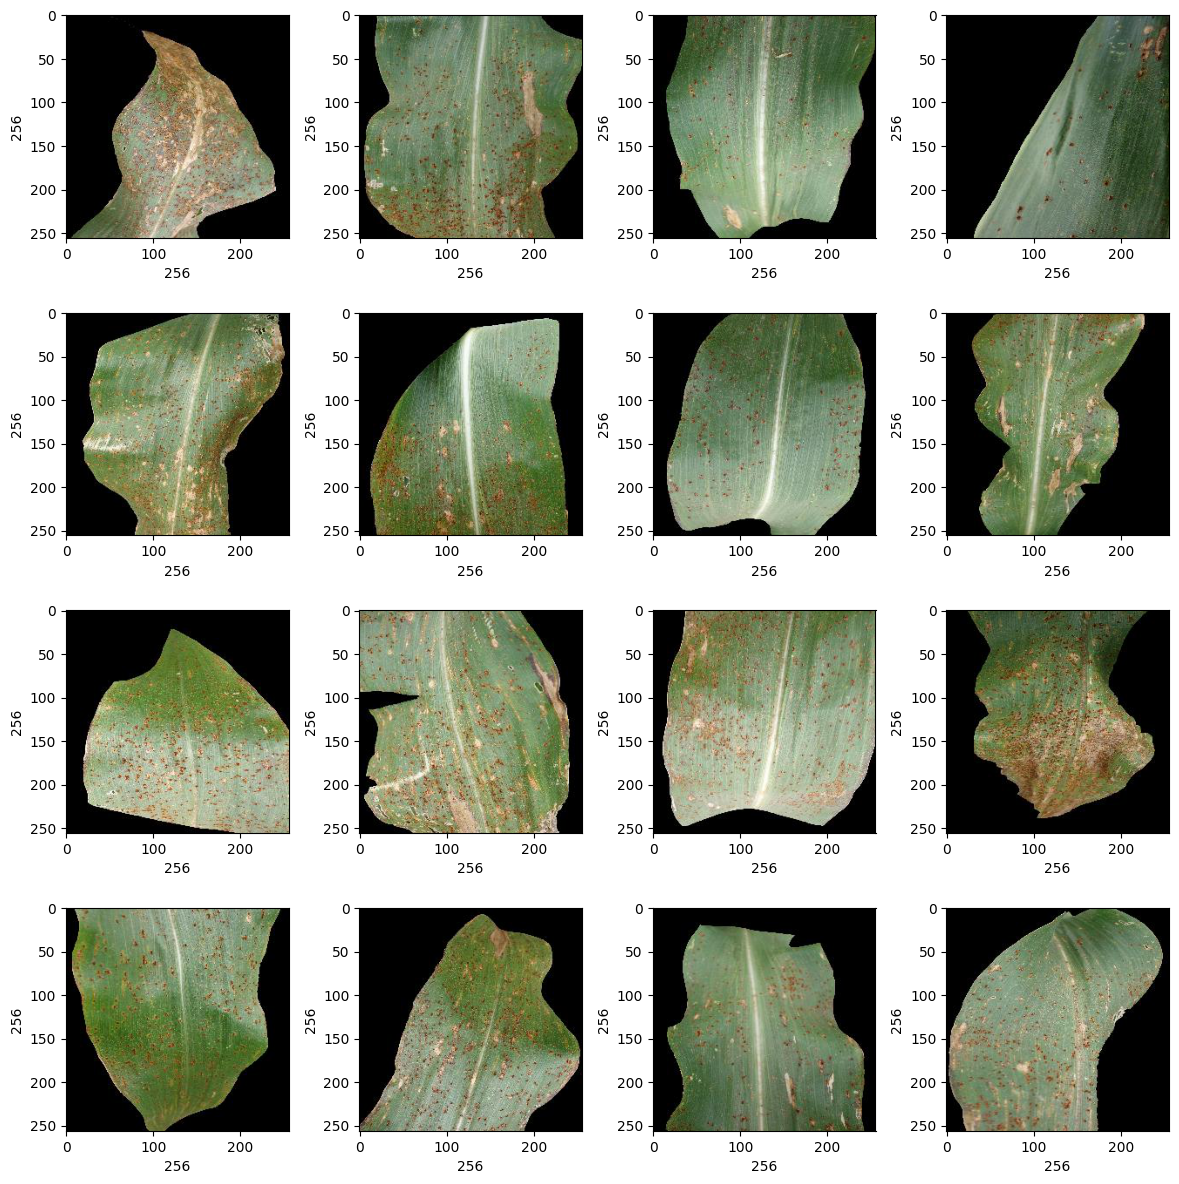

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/data/Collab+Codee/Collab Code/Data/Plant_images_pianalytix/Corn_(maize)___Common_rust_"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    random_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(random_img)
    plt.xlabel(random_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(random_img.shape[0], fontsize = 10)#height of image

 create a function to convert the images into a numpy array

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Convert all the images into numpy array.

In [ ]:
dir = "/content/drive/MyDrive/data/Collab+Codee/Collab Code/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Observe the number of images under different classes to see if the dataset is balanced or not

In [ ]:
# Number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

Next we will observe the shape of the image.

In [ ]:
image_list[0].shape

(256, 256, 3)

Checking the total number of the images which is the length of the labels list.

In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

Sklearn train_test_split to split the dataset into testing and training data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)
# reduce shufflling, get same data split each time

Normalize the dataset of our images.

In [ ]:
def normalize_image(image_array):
  image_array = np.array(image_array)
  image_array = image_array / image_array.max()
  # max_val = image_array.max()
  # image_array = image_array / max_val
  return image_array

#x_train_normal = normalize_image(x_train)
x_train = np.array(x_train, dtype=np.float16) / 255.0
#x_train = np.array(x_train, dtype=np.float16)
x_train = np.array(x_train, dtype=np.float16) / x_train.max()
x_test = np.array(x_test, dtype=np.float16) / 225.0

x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)
#print(x_train_normal)
# x_train

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Nueral Network  creation

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
#model.add(AveragePooling2D(pool_size=(3,3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 28224)             0         
                                                                 
 dense_6 (Dense)             (None, 8)                

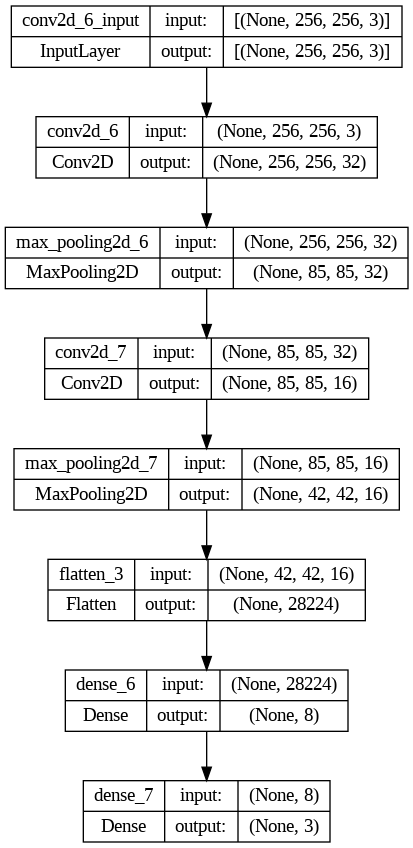

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

While compiling the model set the type of loss for the model alongwith this we also need to set the optimizer and the metrics respectively.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])
# Try ----> Sparse categorical cross entropy

Split the dataset into validation and training data.

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning.

In [ ]:
# Training the model
# trainnig exaples = 80% of 900 = 720
# iterations = (total examples / batchsize)*epochs = (720/128)*50 = appro9x 281 (weights and bias are updated)


epochs = 50
   #iteration
batch_size = 128
   # number of training data used in each iteration
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 2s 329ms/step - loss: 1.0296 - accuracy: 0.5278 - val_loss: 0.9715 - val_accuracy: 0.5139
Epoch 2/50
5/5 [==============================] - 1s 147ms/step - loss: 0.8979 - accuracy: 0.6424 - val_loss: 0.8302 - val_accuracy: 0.7847
Epoch 3/50
5/5 [==============================] - 1s 140ms/step - loss: 0.7789 - accuracy: 0.7812 - val_loss: 0.7295 - val_accuracy: 0.6736
Epoch 4/50
5/5 [==============================] - 1s 165ms/step - loss: 0.6747 - accuracy: 0.7812 - val_loss: 0.6244 - val_accuracy: 0.8333
Epoch 5/50
5/5 [==============================] - 1s 170ms/step - loss: 0.5833 - accuracy: 0.8455 - val_loss: 0.5534 - val_accuracy: 0.7639
Epoch 6/50
5/5 [==============================] - 1s 176ms/step - loss: 0.5121 - accuracy: 0.8247 - val_loss: 0.4727 - val_accuracy: 0.9167
Epoch 7/50
5/5 [==============================] - 1s 176ms/step - loss: 0.4512 - accuracy: 0.8958 - val_loss: 0.4281 - val_accuracy: 0.8542
Epoch 8/50
5/5 [====

Saving the model

In [ ]:
model.save("/content/drive/MyDrive/Plant diseas /Plant+Disease+Flask+App/Plant Disease Flask App/Plant_Disease/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

Plot the accuracy of the model for the trainig history.

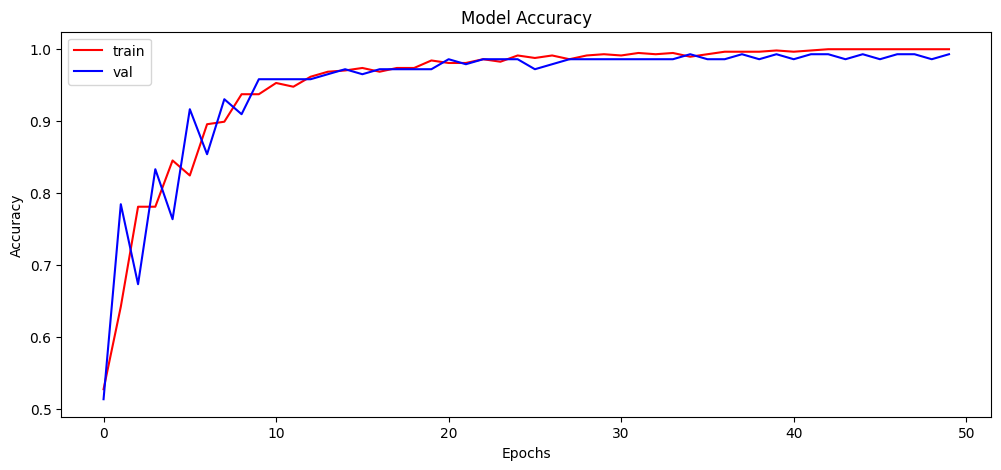

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Evaluating the model to know the accuracy of the model.


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 18ms/step - loss: 0.0454 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


Next we will use our model to predict predicting the testing dataset label.

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 26ms/step


In [ ]:
# Plotting image to compare
img = img_to_array(x_test[31])


Printing out the original and the predicted label.

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[22])])
print("Predicted : ",all_labels[np.argmax(y_pred[22])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
